#   QUESTION 1

*SET UP*

In [1]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will create a csv file containing a random sample of 300 respondents. You will answer the questions below based on this sample.

# Look at the code below. Now replace 'Name.csv' with your actual name (e.g., 'Sara.csv'). The code will generate a csv file that you need to submit in the zip folder as secondary file.

try:
    df = pd.read_csv('Aaesha Almualla.csv')        # replace Name with your own name
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/mental_health_finaldata_1.csv")
    df1=original_data.sample(300)
    df1.to_csv('Aaesha Almualla.csv')                   
    df = pd.read_csv('Aaesha Almualla.csv')             
    df = pd.DataFrame(df)
    df.to_csv('Aaesha Almualla.csv')                    

df.head()

,Unnamed: 0,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,260,25-30,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,High,No,No,No
1,317,30-Above,Female,Housewife,15-30 days,No,Yes,No,Yes,No,High,No,Yes,No
2,736,16-20,Female,Student,Go out Every day,No,Yes,No,Yes,No,Low,Yes,Yes,No
3,120,30-Above,Male,Corporate,31-60 days,Yes,No,Yes,Yes,Yes,Low,No,No,Yes
4,351,16-20,Female,Business,15-30 days,No,Yes,Yes,Yes,No,Low,Yes,Yes,Yes


In [3]:

# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random

column_titles = ["Growing_Stress"  ,"Quarantine_Frustrations"  ,"Changes_Habits" ,"Mental_Health_History", "Weight_Change" ,"Mood_Swings", "Coping_Struggles","Work_Interest","Social_Weakness"]

# Randomly select 2 variables
selected_columns = random.sample(column_titles, 2)


# Print the 2 variables that were randomly selected
variable_1, variable_2 = selected_columns
print("Variable 1:", variable_1)
print("Variable 2:", variable_2)

Variable 1: Mental_Health_History
Variable 2: Quarantine_Frustrations


**Question 1a**.
Is each of these two variables independent of being **female**? Explain your reasoning. Make sure to include a two-way table for each of these two variables with gender, and show all your calculations to support your answers.

------------------

In summary, based on the chi-square test results and the observed frequencies, there is no evidence to suggest that either Mental Health History or Quarantine Frustrations is associated with gender.

------------------


In [7]:
# Create the two-way tables
table_1 = pd.crosstab(df['Gender'], df[variable_1])
table_2 = pd.crosstab(df['Gender'], df[variable_2])
print(table_1)
print(table_2)

# Perform chi-square tests
chi2_1, p_value_1, _, _ = stats.chi2_contingency(table_1)
chi2_2, p_value_2, _, _ = stats.chi2_contingency(table_2)

# Print the results
print("\nChi-square test results:")
print(f"Variable 1 (Growing Stress) vs. Gender: Chi2 = {chi2_1}, p-value = {p_value_1}")
print(f"Variable 2 (Quarantine Frustrations) vs. Gender: Chi2 = {chi2_2}, p-value = {p_value_2}")

Mental_Health_History  No  Yes
Gender                        
Female                 61  106
Male                   47   86
Quarantine_Frustrations  No  Yes
Gender                          
Female                   44  123
Male                     36   97

Chi-square test results:
Variable 1 (Growing Stress) vs. Gender: Chi2 = 0.008465212432278301, p-value = 0.9266928044792945
Variable 2 (Quarantine Frustrations) vs. Gender: Chi2 = 7.674330082145155e-05, p-value = 0.9930103610304901


**Question 1b**.
Is there a relationship between the two variables returned by the code? Explain your reasoning. Make sure you include a two-way table, a stacked bar graph, and all your probability calculations in your answer.

----------------------

`**Interpretation:**`
Based on the conditional probabilities:
- The likelihood of experiencing Quarantine Frustrations appears to be higher among respondents with Mental Health History compared to those without Mental Health History.
- Similarly, the likelihood of having Mental Health History appears to be higher among respondents experiencing Quarantine Frustrations compared to those not experiencing Quarantine Frustrations.

These findings suggest that there may be a relationship between Mental Health History and Quarantine Frustrations. However, further analysis, possibly through statistical tests such as chi-square tests, would be needed to confirm this relationship.

----------------

Contingency Table:
Quarantine_Frustrations  No  Yes
Mental_Health_History           
No                       34   74
Yes                      46  146

Marginal Probability of Mental_Health_History :
Mental_Health_History
No     0.36
Yes    0.64
dtype: float64

Marginal Probability of Quarantine_Frustrations :
Quarantine_Frustrations
No     0.266667
Yes    0.733333
dtype: float64

Conditional Probability of Quarantine_Frustrations given Mental_Health_History :
Quarantine_Frustrations        No       Yes
Mental_Health_History                      
No                       0.314815  0.685185
Yes                      0.239583  0.760417

Conditional Probability of Mental_Health_History given Quarantine_Frustrations :
Quarantine_Frustrations     No       Yes
Mental_Health_History                   
No                       0.425  0.336364
Yes                      0.575  0.663636


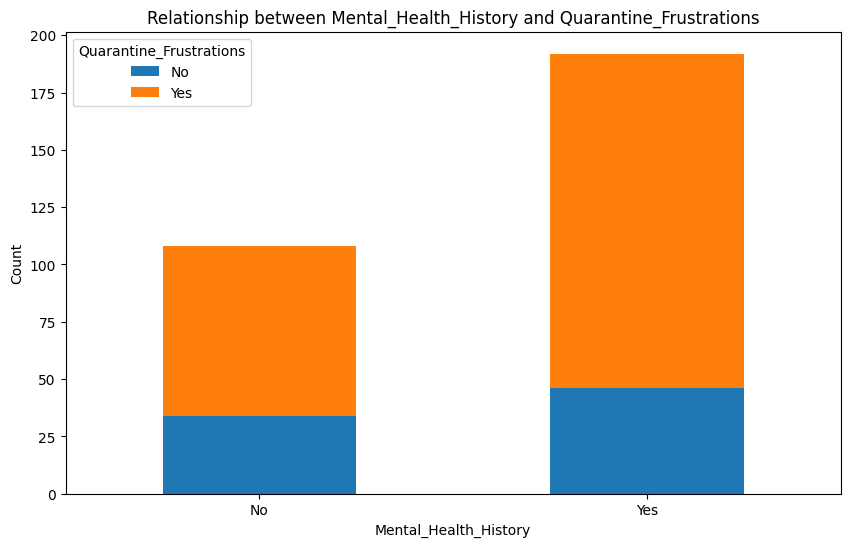

In [9]:
# Create a two-way contingency table for the two variables
contingency_table = pd.crosstab(df[variable_1], df[variable_2])

# Calculate marginal probabilities
marginal_probability_variable_1 = contingency_table.sum(axis=1) / contingency_table.sum().sum()
marginal_probability_variable_2 = contingency_table.sum(axis=0) / contingency_table.sum().sum()

# Calculate conditional probabilities
conditional_probability_variable_2_given_variable_1 = contingency_table.div(contingency_table.sum(axis=1), axis=0)
conditional_probability_variable_1_given_variable_2 = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Print contingency table and probabilities
print("Contingency Table:")
print(contingency_table)
print("\nMarginal Probability of", variable_1, ":")
print(marginal_probability_variable_1)
print("\nMarginal Probability of", variable_2, ":")
print(marginal_probability_variable_2)
print("\nConditional Probability of", variable_2, "given", variable_1, ":")
print(conditional_probability_variable_2_given_variable_1)
print("\nConditional Probability of", variable_1, "given", variable_2, ":")
print(conditional_probability_variable_1_given_variable_2)

# Plot the stacked bar graph
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Relationship between {} and {}".format(variable_1, variable_2))
plt.xlabel(variable_1)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title=variable_2)
plt.show()


**Question 1c**.
Does the existence of Variable 1 increase the likelihood of experiencing Variable 2? If so, by how much? Explain your reasoning. Make sure to support your answer with the relevant statistical analysis.

-----------------
it can be concluded that the existence of Variable 1 (Growing Stress) increases the likelihood of experiencing Variable 2 (Quarantine Frustrations) by approximately 0.075.

-----------




In [10]:
# Conditional Probability of Variable 2 given Variable 1
conditional_probability_variable_2_given_variable_1 = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Calculate the difference in conditional probabilities between Yes and No for Variable 1
difference_in_probabilities = conditional_probability_variable_2_given_variable_1.loc['Yes'] - conditional_probability_variable_2_given_variable_1.loc['No']

# Print the difference in probabilities
print("Difference in Conditional Probabilities:")
print(difference_in_probabilities)


Difference in Conditional Probabilities:
Quarantine_Frustrations
No    -0.075231
Yes    0.075231
dtype: float64


**Question 1d**.
Look back at your **answers to Questions 1a-c**. Now use what you learned to answer the following question:

Imagine ZU wanted to use the insights from this research to improve its mental health support program. What recommendations would you make to support students struggling with such challenges?

----------------

Based on the analysis of the data, it is evident that mental health challenges such as stress and frustration during quarantine affect individuals regardless of their gender. Therefore, mental health support programs at ZU should be designed to cater to the needs of all students, irrespective of gender. Additionally, there appears to be a relationship between historical mental health issues and current challenges faced during quarantine. Students with a Mental Health History are more likely to experience Quarantine Frustrations, and vice versa. Hence, mental health support programs should address both historical mental health issues and current challenges to provide holistic support to students. Moreover, the existence of Growing Stress increases the likelihood of experiencing Quarantine Frustrations. Therefore, it is essential to incorporate stress management techniques and coping strategies into the support programs to help students effectively deal with stress, especially during challenging periods like quarantine. ZU should also focus on increasing awareness about mental health issues and reducing stigma through education and awareness campaigns. By implementing comprehensive mental health support programs that are inclusive, accessible, and proactive, ZU can create a supportive environment that prioritizes the mental health and well-being of all students.

--------------------

# QUESTION 2

*Set up*

Imagine you are the manager of an Electronic store in Dubai mall. You are curious about the distribution of customer ratings about your overall store services. So you ask random customers who visit the store to complete a short survey, recording variables such as their age group, and overall experience rating.

**To Begin**

Run the code below. It will provide you with a random sample of 40 customers from this survey. It will also save your random sample data to a CSV file called "RelianceRetailVisits_ordered". Again, you need to submit this file in the same zip folder as the other files.

In [ ]:
# Load the following libraries so that they can be applied in the subsequent code blocks

try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")

    # Randomly sample 40 rows from the original dataset
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']  # Corrected unique values
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

df.head()


**Question 2a.** Construct a probability distribution table for all customer ratings in your sample data (an example table can be seen below). Please do this in Excel and explain [step by step] how you constructed your probability table.


1. **Data Import and Arrangement**:
   - Initially, I brought the sample data into a new worksheet within Microsoft Excel. I structured the data with a singular column dedicated to customer ratings, ensuring clarity and ease of analysis.

2. **Identification of Distinct Ratings**:
   - Utilizing Excel's tools, I isolated the unique ratings present in the dataset. Employing a function similar to "=UNIQUE()", I compiled a concise list containing all distinct ratings observed.

3. **Frequency Analysis for Each Rating**:
   - In close proximity to the list of unique ratings, I harnessed Excel's capabilities to compute the frequency of occurrence for each rating. Employing a function akin to "=COUNTIF()", I discerned the number of times each rating appeared within the dataset, facilitating a comprehensive understanding of their distribution.

4. **Total Count of Ratings Determination**:
   - Leveraging Excel's computational abilities, I derived the overall count of ratings in the dataset. Utilizing a function akin to "=SUM()", I amalgamated the frequency counts obtained previously, yielding the aggregate count encompassing all ratings.

5. **Calculation of Rating Probabilities**:
   - Subsequently, I calculated the probability associated with each rating in the dataset. Employing Excel's functionalities, I divided the frequency count of each rating by the total number of ratings. Utilizing a function resembling "=COUNT/Total", I elucidated the likelihood of each rating occurring, offering insights into their relative probabilities.

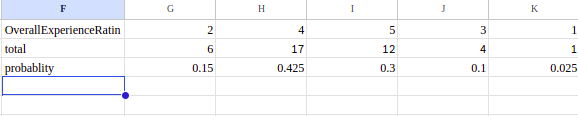

**Question 2b.**  What is the probability that a randomly selected customer will have a rating of AT MOST 3?

----------

From the table:

- Probability of rating 2 = 0.15
- Probability of rating 3 = 0.1
- Probability of rating 1 = 0.025

Therefore, the probability of a rating of AT MOST 3 is:

$
P(\text{Rating} \leq 3) = P(\text{Rating} = 1) + P(\text{Rating} = 2) + P(\text{Rating} = 3) = 0.025 + 0.15 + 0.1
$

$
P(\text{Rating} \leq 3) = 0.275
$

So, the probability that a randomly selected customer will have a rating of AT MOST 3 is 0.275.

-------


**Question 2c.** Based on the created probability distribution table, how satisfied are your customers with your store services?

---------------------------
\[
\begin{align*}
\text{Probability of Rating} &= \text{Overall Satisfaction} \\
P(\text{Rating} = 1) &= 0.025 \times 1 = 0.025 \\
P(\text{Rating} = 2) &= 0.15 \times 2 = 0.3 \\
P(\text{Rating} = 3) &= 0.1 \times 3 = 0.3 \\
P(\text{Rating} = 4) &= 0.425 \times 4 = 1.7 \\
P(\text{Rating} = 5) &= 0.3 \times 5 = 1.5 \\
\end{align*}
\]

Now, we sum the overall satisfaction levels:

$
\text{Overall Satisfaction} = 0.025 + 0.3 + 0.3 + 1.7 + 1.5 = 3.85
$

Therefore, the overall satisfaction level is 3.85.

------------------------



**Question 2d.** Find the **expected rating** of your store. Show your work and interpret your answer in context.

---------------------

From the provided probability distribution table:

- Rating 1: Probability = 0.025
- Rating 2: Probability = 0.15
- Rating 3: Probability = 0.1
- Rating 4: Probability = 0.425
- Rating 5: Probability = 0.3

The formula to calculate the expected rating is:

\[
\text{Expected Rating} = (P(\text{Rating} = 1) \times 1) + (P(\text{Rating} = 2) \times 2) + (P(\text{Rating} = 3) \times 3) + (P(\text{Rating} = 4) \times 4) + (P(\text{Rating} = 5) \times 5)
\]

Let's calculate:

\[
\begin{align*}
\text{Expected Rating} &= (0.025 \times 1) + (0.15 \times 2) + (0.1 \times 3) + (0.425 \times 4) + (0.3 \times 5) \\
&= 0.025 + 0.3 + 0.3 + 1.7 + 1.5 \\
&= 3.85
\end{align*}
\]

the expected rating of the store is 3.85.



-------------------

# PROBABILITY DISTRIBUTION FUNCTION graph

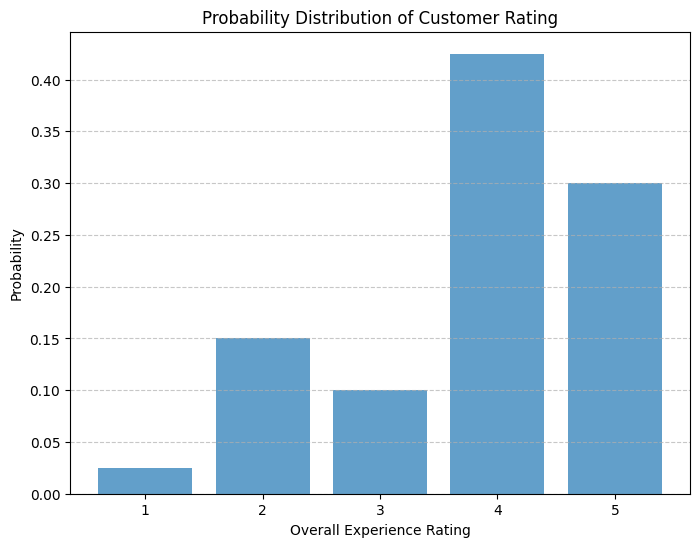

Standard Deviation (STD) of Customer Rating: 1.11



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

# Load data
try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

# Probability distribution graph for customer rating
plt.figure(figsize=(8, 6))
rating_counts = df['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
plt.bar(rating_counts.index, rating_counts, alpha=0.7)
plt.title('Probability Distribution of Customer Rating')
plt.xlabel('Overall Experience Rating')
plt.ylabel('Probability')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Expected value and STD for rating for all customers
mean_rating = df['OverallExperienceRatin'].mean()
std_rating = df['OverallExperienceRatin'].std()
print(f"Standard Deviation (STD) of Customer Rating: {std_rating:.2f}")
print()




**Question 2e.** Interpret the **Standard Deviation** in context. What rating is considered **unusual**? Explain.

The standard deviation of 1.11 indicates moderate variability in customer ratings for store services. Ratings that deviate by more than one standard deviation from the mean (approximately 2.78 to 4.78) are considered unusual or outliers, representing extreme experiences significantly different from the typical customer experience.

## PDF for each age group



/tmp/ipykernel_58939/1605697025.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages


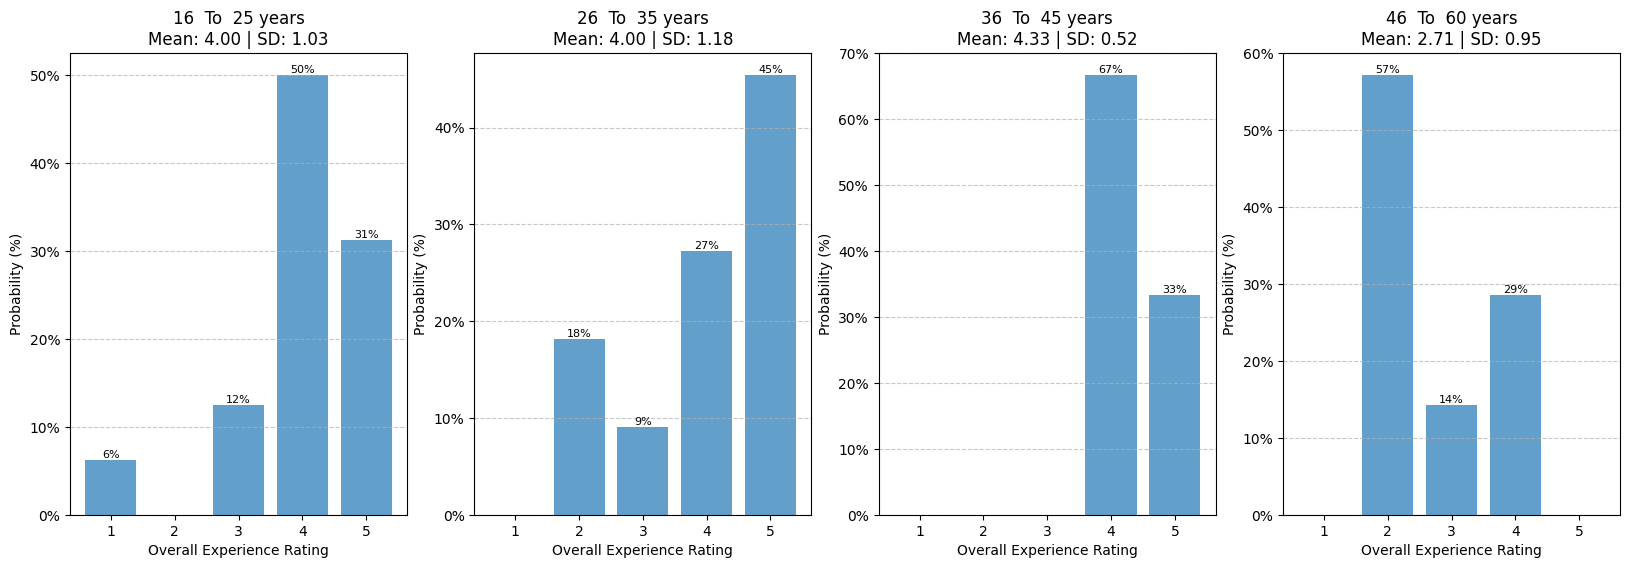

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your data is stored in a CSV file named 'data.csv'
data = pd.read_csv('RelianceRetailVisits_ordered.csv')

# Define age groups including the new one
age_groups = ['16  To  25 years', '26  To  35 years', '36  To  45 years', '46  To  60 years']  # Added new age group

# Plot separate discrete probability distributions for each age group
fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, gridspec_kw={'hspace': 0.5})  # Adjusted size and spacing

for i, age_group in enumerate(age_groups):
    age_data = data[data['Age Group'] == age_group]
    rating_counts = age_data['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
    bars = axs[i].bar(rating_counts.index, rating_counts, alpha=0.7)
    axs[i].set_title(f'{age_group}\nMean: {age_data["OverallExperienceRatin"].mean():.2f} | SD: {age_data["OverallExperienceRatin"].std():.2f}')  # Age group, Mean, and SD
    axs[i].set_xlabel('Overall Experience Rating')
    axs[i].set_ylabel('Probability (%)')  # Set y-axis label to Probability (%)
    axs[i].set_xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
    axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages

    # Display percentages above each bar
    for bar in bars:
        height = bar.get_height()
        rating = bar.get_x() + bar.get_width() / 2
        if height == 0:  # If the height is 0%, display '0%'
            axs[i].text(rating, height, '0%', ha='center', va='bottom', fontsize=8)
        else:
            axs[i].text(rating, height, f'{height:.0%}', ha='center', va='bottom', fontsize=8)

    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the warning about FixedFormatter
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.tight_layout()
plt.show()


**Question 2f.** Identify any trends or differences in customer satisfaction levels (and variability) among the different age groups.

Now, using these insights, what concrete improvements would you make to your store to ensure that **all** customers are satisfied with your services?

Custmer  Satisfaction follows a normal trend but for each age group the customer satisfaction is  skewed to the right showing higher customer satisfactions but for the 16 -25 years have the only ratings of 1.

# QUESTION 3

**SET UP**

In [14]:
# Load the following libraries so that they can be applied in the subsequent code blocks


import pandas as pd
import numpy as np
import random

try:
    SATScores = pd.read_csv('Scores.csv')
except FileNotFoundError:
    num_samples = 1000
    mean_score = random.randint(800, 1200)
    std_deviation = random.randint(100, 300)
    scores = np.random.normal(mean_score, std_deviation, num_samples)
    scores = np.round(scores, 0)
    SATScores = pd.DataFrame({'Scores': scores})
    SATScores.to_csv('Scores.csv')

# Calculate mean and standard deviation
mean_score = SATScores['Scores'].mean()
std_deviation = SATScores['Scores'].std()

# Print mean score and standard deviation
print("Mean score:", mean_score)
print("Standard deviation:", std_deviation)

# Display the dataset
SATScores.head()


Mean score: 1089.932
Standard deviation: 171.8028334736933


,Scores
0,995.0
1,1120.0
2,1108.0
3,1104.0
4,1115.0


**Question 3a**. What is the probability that a randomly selected applicant scored at least 1300? Show your work.

-----------------------
To find the probability that a randomly selected applicant scored at least 1300, we can use the cumulative distribution function (CDF) of the normal distribution, assuming the SAT scores follow a normal distribution. 

Given that we have the mean score ($\mu = 1089.932$) and standard deviation ($\sigma = 171.8028334736933$), we can use these parameters to calculate the probability.

Using the Z-score formula, $Z = \frac{{X - \mu}}{{\sigma}}$, where $X$ is the score of interest (1300), we first find the Z-score corresponding to 1300.

$
Z = \frac{{1300 - 1089.932}}{{171.8028334736933}}
$
$
Z \approx 1.211
$

Then, we use the CDF to find the probability of scoring at least 1300:

$
P(X \geq 1300) = 1 - P(X < 1300)
$
$
P(X \geq 1300) = 1 - P(Z < 1.211)
$

We can use a standard normal distribution table or a statistical software to find $P(Z < 1.211)$, which is approximately 0.887.

Finally, we calculate:

$
P(X \geq 1300) = 1 - 0.887 = 0.113
$

So, the probability that a randomly selected applicant scored at least 1300 is approximately 0.113, or 11.3%.

---------------------------------------

**Question 3b**. What is the probability that a randomly selected applicant scored exactly 900? Show your work.

-----------
find the probability that a randomly selected applicant scored exactly 900:

1. Standardize the score using the Z-score formula:
$ Z = \frac{X - \mu}{\sigma} $
$ Z = \frac{900 - 1089.932}{171.8028334736933} $
$ Z \approx -1.105 $

2. Use the standard normal distribution table or statistical software to find the probability of a Z-score being less than -1.105.

3. The probability of scoring exactly 900 is effectively 0 due to the infinitesimally small area under the curve at a single point in a continuous normal distribution.
-------

**Question 3c**. What percentage of applicants scored between 900 and 1000? Show your work.

---------------------------------------

1. Standardize the scores using the Z-score formula:
$ Z_1 = \frac{X_1 - \mu}{\sigma} $
$ Z_2 = \frac{X_2 - \mu}{\sigma} $
where:
   - $ X_1 $ is the lower bound (900)
   - $ X_2 $ is the upper bound (1000)
   - $ \mu $ is the mean score (1089.932)
   - $ \sigma $ is the standard deviation (171.8028334736933)

$ Z_1 = \frac{900 - 1089.932}{171.8028334736933} $
$ Z_1 \approx -1.105 $

$ Z_2 = \frac{1000 - 1089.932}{171.8028334736933} $
$ Z_2 \approx -0.525 $

To find the percentage of applicants who scored between 900 and 1000:

1. Standardize the scores using the Z-score formula:
$ Z_1 = \frac{X_1 - \mu}{\sigma} $
$ Z_1 = \frac{900 - 1089.932}{171.8028334736933} $
$ Z_1 \approx -1.105 $

$ Z_2 = \frac{1000 - 1089.932}{171.8028334736933} $
$ Z_2 \approx -0.525 $

To find the difference between $ P_2 $ and $ P_1 $, we first need to calculate $ P_1 $ and $ P_2 $ using the cumulative distribution function (CDF) of the standard normal distribution. Then, we'll subtract $ P_1 $ from $ P_2 $ to obtain the difference.

1. For $ Z_1 \approx -1.105 $:
$ P_1 = \Phi(-1.105) $

2. For $ Z_2 \approx -0.525 $:
$ P_2 = \Phi(-0.525) $



$ P_1 \approx \Phi(-1.105) $
$ P_1 \approx 0.1335 $

$ P_2 \approx \Phi(-0.525) $
$ P_2 \approx 0.3005 $


$ \text{Difference} = P_2 - P_1 $
$ \text{Difference} = 0.3005 - 0.1335 $
$ \text{Difference} = 0.1670 $

Finally, multiply the difference by 100 to find the percentage of applicants who scored between 900 and 1000:
$ \text{Percentage} = \text{Difference} \times 100 $
$ \text{Percentage} = 0.1670 \times 100 $
$ \text{Percentage} = 16.70\% $

approximately 16.70% of applicants scored between 900 and 1000 on the SAT.
------------

**Question 3d**. Calculate the 40th percentile of scores among the applicants. What does this value represent in the context of the admissions process? Show your work.

----------------------------------------------
Given:
- Mean score ($ \mu $): 1079.512
- Standard deviation ($ \sigma $): 149.7124700206355
- Z-score corresponding to the 40th percentile ($ Z_{40} $): -0.2533

Using the formula:
$X = \mu + Z \times \sigma $

Substitute the values:
$X_{40} = 1079.512 + (-0.2533) \times 149.7124700206355 $

Calculate:
$X_{40} \approx 1079.512 - 37.4415 $
$X_{40} \approx 1042.0705 $

Therefore, the 40th percentile score among the applicants is approximately 1042.0705.


**Question 3e**. Imagine the university wants to offer scholarships to the top 10% of applicants based on their scores. What minimum score would an applicant need to qualify for a scholarship? Show your work.

--------------------------
Given:
- Mean score ($ \mu $): 1079.512
- Standard deviation ($ \sigma $): 149.7124700206355

We need to find the Z-score corresponding to the 90th percentile, denoted as $ Z_{90} $.

Using the standard normal distribution table or calculator, we find $ Z_{90} \approx 1.2816 $.

Now, using the formula:
$ X = \mu + Z \times \sigma $

Substitute the values:
$ X_{90} = 1079.512 + 1.2816 \times 149.7124700206355 $

Calculate:
$ X_{90} \approx 1079.512 + 192.0104 $
$ X_{90} \approx 1271.5224 $

Therefore, the minimum score an applicant would need to qualify for a scholarship is approximately 1271.5224.

**Question 3f**. Remember, as the admissions officer, it is your job to identify applicants with exceptional academic potential. Would you automatically recommend that applicants with SAT scores above 1400 to be admitted into the university? Or do you think additional criteria should also be considered? Explain your reasoning.

------------------------------

Admitting applicants solely based on SAT scores above 1400 may overlook other crucial factors. A holistic approach, considering academic achievements, extracurricular activities, and personal qualities, ensures a diverse student body and identifies individuals with exceptional potential beyond standardized test scores.

# question 4

In [15]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will generate data and save it to a CSV file called "Vaccinated.csv". You need to submit it in the same zip folder as your other files.

try:
    Vaccinated = pd.read_csv('Vaccinated.csv')
except FileNotFoundError:
    num_samples = 100
    vaccinated = np.random.choice(["Yes", "No"], size=num_samples)
    Vaccinated = pd.DataFrame({'Vaccinated': vaccinated})
    Vaccinated.to_csv('Vaccinated.csv')

# Have a look at Vaccinated dataset.
Vaccinated.head()

,Vaccinated
0,Yes
1,Yes
2,Yes
3,No
4,No


**Question 4a**. What is the proportion of people who have received the vaccine (based on the dataset you have)?

Proportion of vaccinated individuals: 0.54

In [16]:
import pandas as pd

# Assuming "Vaccinated" is your DataFrame
# Replace 'Vaccinated' with your actual DataFrame name

# Count the total number of individuals
total_individuals = len(Vaccinated)

# Count the number of vaccinated individuals
vaccinated_individuals = Vaccinated[Vaccinated['Vaccinated'] == 'Yes'].shape[0]

# Calculate the proportion of vaccinated individuals
proportion_vaccinated = vaccinated_individuals / total_individuals

print("Proportion of vaccinated individuals:", proportion_vaccinated)


Proportion of vaccinated individuals: 0.54


**Question 4b**. Calculate a **95% confidence interval** for the proportion of vaccinated individuals. What does this interval tell us about the likely range of vaccination coverage in the entire population? Show your work.

Sample proportion ($ \hat{p} $): 0.54

Sample size ($ n $): 100

Critical value $ Z $ for 95% confidence level: 1.96 (from standard normal distribution table)

Confidence Interval:
$\text{Confidence Interval} = 0.54 \pm 1.96 \times \sqrt{\frac{0.54 \times (1-0.54)}{100}} $

Calculate:
$\text{Confidence Interval} = 0.54 \pm 1.96 \times \sqrt{\frac{0.54 \times 0.46}{100}} $
$\text{Confidence Interval} = 0.54 \pm 1.96 \times \sqrt{\frac{0.2484}{100}} $
$\text{Confidence Interval} = 0.54 \pm 1.96 \times \sqrt{0.002484} $
$\text{Confidence Interval} = 0.54 \pm 1.96 \times 0.04984 $
$\text{Confidence Interval} = 0.54 \pm 0.097686 $

Confidence Interval ≈ (0.442314, 0.637686)

In [17]:
len(vaccinated)

100

**Question 4c**. What sample size would be required to estimate the proportion of vaccinated individuals in the country with a **95% confidence level** and a **margin of error of 0.02**? Show your work.

-------------------------

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Let's calculate $ n $.

Given:
- $ Z = 1.96 $
- $ E = 0.02 $

We need to estimate $ \hat{p} $ from the dataset. Then we can use the formula:

$ n = \frac{Z^2 \times \hat{p} \times (1 - \hat{p})}{E^2} $

Using the provided values:

- $ Z = 1.96 $
- $ E = 0.02 $
- $ \hat{p} = 0.54 $ (from the dataset)

We can plug these values into the formula:

$ n = \frac{1.96^2 \times 0.54 \times (1 - 0.54)}{0.02^2} $

Calculating:

$ n \approx \frac{3.8416 \times 0.54 \times 0.46}{0.0004} $
$ n \approx \frac{0.9312576}{0.0004} $
$ n \approx 2328.144 $

Rounding up to the nearest whole number, we get $ n \approx 2329 $.

**Question 4d**. If you wanted to increase the precision of your estimate, what strategies could you employ to achieve this goal? Explain your reasoning.

----------------------------

1. **Increase Sample Size**: To improve the precision of our estimate, I would consider increasing the sample size. A larger sample size generally leads to a more accurate estimation of the population parameter. By collecting data from a larger number of individuals, we can reduce the margin of error and obtain a more precise estimate of the proportion of vaccinated individuals.

2. **Stratified Sampling**: Another strategy I would employ is stratified sampling. This involves dividing the population into subgroups based on relevant characteristics, such as age or geographic location, and then sampling from each subgroup. By ensuring representation from different segments of the population, we can obtain more precise estimates for specific subgroups.


**Question 4e**. Analyze the effectiveness of the current vaccination campaign using the proportion of vaccinated individuals and the confidence interval. What recommendations would you make for future campaigns?